1) first open the file using fopen
2) import nltk
3) tokenize ( sentence into words and also removes the stop words)
4) stemming (root of the word is used) and normalization
5) feature extraction
6) classification into motivational and demotivational



<a href = "https://realpython.com/python-keras-text-classification/"><button> Article-Click Me </button> </a>

In [1]:
!pip install nltk

In [2]:
#importing the libraries
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
#playing with nltk

text = "You will win if you work hard"
print(nltk.sent_tokenize(text))

['You will win if you work hard']


In [5]:
print(nltk.word_tokenize(text))

['You', 'will', 'win', 'if', 'you', 'work', 'hard']


In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
#stop words
from nltk.corpus import stopwords
print(len(stopwords.words("english")))
print(stopwords.words("english"))

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [8]:
#removing the stop words
stop_words = set(stopwords.words('english'))
words = nltk.word_tokenize(text)
words_stop = [i for i in words if not i in stop_words]
print(words)
print(words_stop)

['You', 'will', 'win', 'if', 'you', 'work', 'hard']
['You', 'win', 'work', 'hard']


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
sentences = ["Get up early", "You will win if you work hard", "life is short don't be lazy"]
vec = CountVectorizer(min_df = 0, lowercase = True)
vec.fit(sentences)
print(vec.vocabulary_) #shows the word to index mapping

# lets transform the sentences line by line
word_vector = vec.transform(sentences).toarray()
print(word_vector.shape)
print(word_vector)

{'get': 3, 'up': 10, 'early': 2, 'you': 14, 'will': 11, 'win': 12, 'if': 5, 'work': 13, 'hard': 4, 'life': 8, 'is': 6, 'short': 9, 'don': 1, 'be': 0, 'lazy': 7}
(3, 15)
[[0 0 1 1 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 1 1 1 2]
 [1 1 0 0 0 0 1 1 1 1 0 0 0 0 0]]


In [10]:
data = pd.read_csv('sentences.csv')
print(data.shape)
data

(20, 2)


,Sentences,Labels
0,You will win if you work hard,1
1,Be lazy and win the life,0
2,Quit life and give up,0
3,Be lazy and quit,0
4,Life is short don't be lazy,1
5,Don't be lazy and win,1
6,Don't be lazy and work hard,1
7,Sleep Early and stay positive,1
8,Always stay positive,1
9,I don't want to work hard,0


In [11]:
# motivational sentences : 1

print(sum(data['Labels'] == 1))
data[data['Labels'] == 1]

10


,Sentences,Labels
0,You will win if you work hard,1
4,Life is short don't be lazy,1
5,Don't be lazy and win,1
6,Don't be lazy and work hard,1
7,Sleep Early and stay positive,1
8,Always stay positive,1
10,Don’t be sad,1
11,Be happy and smile,1
13,Work hard,1
18,Things are easy,1


In [12]:
# demotivational sentences : 0

print(sum(data['Labels'] == 0))
data[data["Labels"] == 0]

10


,Sentences,Labels
1,Be lazy and win the life,0
2,Quit life and give up,0
3,Be lazy and quit,0
9,I don't want to work hard,0
12,Forget your dreams,0
14,Don’t work hard,0
15,Simply quit things,0
16,Easily give up,0
17,You will lose if you don’t work,0
19,"Things are hard, so quit",0


In [13]:
# lets clean the sentences
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
data['Cleaned_text'] = data['Sentences'].apply(lambda sent : " ".join(i for i in sent.split() if i not in stop_words))
data

,Sentences,Labels,Cleaned_text
0,You will win if you work hard,1,You win work hard
1,Be lazy and win the life,0,Be lazy win life
2,Quit life and give up,0,Quit life give
3,Be lazy and quit,0,Be lazy quit
4,Life is short don't be lazy,1,Life short lazy
5,Don't be lazy and win,1,Don't lazy win
6,Don't be lazy and work hard,1,Don't lazy work hard
7,Sleep Early and stay positive,1,Sleep Early stay positive
8,Always stay positive,1,Always stay positive
9,I don't want to work hard,0,I want work hard


In [14]:
vec = CountVectorizer(min_df = 0, lowercase = True)
vec.fit(sentences)
print(vec.vocabulary_) #shows the word to index mapping

# lets transform the sentences line by line
word_vector = vec.transform(sentences).toarray()
print(word_vector.shape)
print(word_vector)

{'get': 3, 'up': 10, 'early': 2, 'you': 14, 'will': 11, 'win': 12, 'if': 5, 'work': 13, 'hard': 4, 'life': 8, 'is': 6, 'short': 9, 'don': 1, 'be': 0, 'lazy': 7}
(3, 15)
[[0 0 1 1 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 1 1 1 2]
 [1 1 0 0 0 0 1 1 1 1 0 0 0 0 0]]


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
vec.fit(data['Cleaned_text'])
print(vec.vocabulary_)

{'you': 26, 'win': 24, 'work': 25, 'hard': 10, 'be': 1, 'lazy': 11, 'life': 12, 'quit': 15, 'give': 8, 'short': 17, 'don': 2, 'sleep': 19, 'early': 4, 'stay': 21, 'positive': 14, 'always': 0, 'want': 23, 'sad': 16, 'happy': 9, 'smile': 20, 'forget': 7, 'dreams': 3, 'simply': 18, 'things': 22, 'easily': 5, 'lose': 13, 'easy': 6}


In [16]:
# lets transform the sentences line by line
X = vec.transform(data['Cleaned_text']).toarray()
print(X.shape)
print(type(X))
print(X)

(20, 27)
<class 'numpy.ndarray'>
[[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]
 [0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [17]:
y = data['Labels'].values
print(y.shape)
print(type(y))
print(y)

(20,)
<class 'numpy.ndarray'>
[1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0]


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = "True")

In [19]:
print("X train shape : ", X_train.shape)
print("y train shape : ", y_train.shape)
print("X test shape : ", X_test.shape)
print("y test shape : ", y_test.shape )

X train shape :  (15, 27)
y train shape :  (15,)
X test shape :  (5, 27)
y test shape :  (5,)


In [20]:
# lets train the DL model.

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_shape = (None, 27), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [21]:
# compiling the model
model.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ['accuracy'])

# fitting the model on training data.
history = model.fit(X_train, y_train, epochs = 50, batch_size = 4)

Epoch 1/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7169 - accuracy: 0.4000
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7077 - accuracy: 0.4667
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.4667
Epoch 4/50
4/4 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.4667
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.4667
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.6000
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.6667
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.6667
Epoch 9/50
4/4 [==============================] - 0s 1ms/step - loss: 0.6550 - accuracy: 0.6667
Epoch 10/50
4/4 [==============================] - 0s 998us/step - loss: 0.6473 - accuracy: 0.6667
Epoch 11/50
4/4 [====================

In [22]:
print(history)

In [23]:
# evaluation on the training data.
score = model.evaluate(X_train, y_train)
print("Training loss : ", score[0])
print("Training accuracy : ", score[1])

1/1 [==============================] - 0s 1ms/step - loss: 0.4093 - accuracy: 1.0000
Training loss :  0.4093474745750427
Training accuracy :  1.0


In [24]:
# evaluation on the testing data.
score = model.evaluate(X_test, y_test)
print("Testing loss : ", score[0])
print("Testing accuracy : ", score[1])

1/1 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.6000
Testing loss :  0.6668697595596313
Testing accuracy :  0.6000000238418579


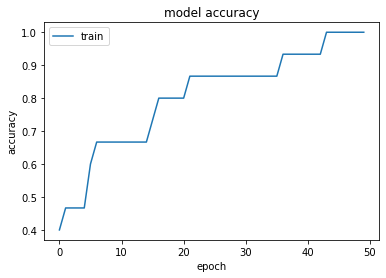

In [25]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

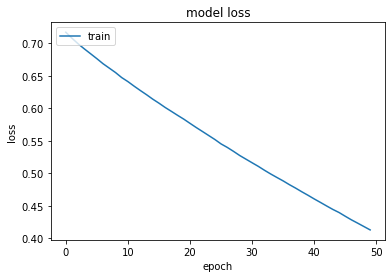

In [26]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
# prediction on new data.

motiv = "You will win and succeed provided you work hard"
demotiv = "Always be lazy and do nothing"

sent_motiv = " ".join(i for i in motiv.split() if i not in stop_words)
sent_demotiv = " ".join(i for i in demotiv.split() if i not in stop_words)

In [29]:
print(motiv)
print(sent_motiv)
print(demotiv)
print(sent_demotiv)

You will win and succeed provided you work hard
You win succeed provided work hard
Always be lazy and do nothing
Always lazy nothing


In [30]:
sent = [sent_motiv, sent_demotiv]
sent = vec.transform(sent).toarray()

In [34]:
y_pred = model.predict(sent)
y_pred

array([[0.63761324],
       [0.6005644 ]], dtype=float32)

In [32]:
y_pred[y_pred > 0.5] = 1
y_pred

array([[1.],
       [1.]], dtype=float32)